In [1]:
import pandas as pd  
import numpy as np  
from sklearn.metrics import explained_variance_score, mean_absolute_error,median_absolute_error
from sklearn.model_selection import train_test_split  
from sklearn import preprocessing,svm
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('cleandata.csv').set_index('序號')

In [3]:
df

,測站氣壓(hPa),溫度(℃),相對溼度(%),風向,風速(m/s)
序號,,,,,
1,1018.3,18.2,75,4,3.0
2,1018.3,17.8,78,3,3.9
3,1018.0,17.4,81,3,3.2
4,1017.9,17.2,80,3,3.9
5,1017.5,17.2,79,3,4.1
6,1017.0,17.1,77,4,3.9
7,1016.6,17.5,73,3,4.4
8,1016.4,17.8,71,4,5.4
9,1016.5,18.3,68,4,4.3


In [4]:
def derive_nth_day_feature(df, feature, N):
    col_name = "{}_{}".format(feature, N)
    df.loc[:,col_name] = df.loc[:,feature].shift(N)

In [5]:
numattr = ['測站氣壓(hPa)','溫度(℃)','相對溼度(%)','風向','風速(m/s)']
feature = '溫度(℃)'

In [6]:
for i in numattr:
    for N in range(2, 4):
        derive_nth_day_feature(df, i, N)

In [7]:
df

,測站氣壓(hPa),溫度(℃),相對溼度(%),風向,風速(m/s),測站氣壓(hPa)_2,測站氣壓(hPa)_3,溫度(℃)_2,溫度(℃)_3,相對溼度(%)_2,相對溼度(%)_3,風向_2,風向_3,風速(m/s)_2,風速(m/s)_3
序號,,,,,,,,,,,,,,,
1,1018.3,18.2,75,4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1018.3,17.8,78,3,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1018.0,17.4,81,3,3.2,1018.3,NaN,18.2,NaN,75.0,NaN,4.0,NaN,3.0,NaN
4,1017.9,17.2,80,3,3.9,1018.3,1018.3,17.8,18.2,78.0,75.0,3.0,4.0,3.9,3.0
5,1017.5,17.2,79,3,4.1,1018.0,1018.3,17.4,17.8,81.0,78.0,3.0,3.0,3.2,3.9
6,1017.0,17.1,77,4,3.9,1017.9,1018.0,17.2,17.4,80.0,81.0,3.0,3.0,3.9,3.2
7,1016.6,17.5,73,3,4.4,1017.5,1017.9,17.2,17.2,79.0,80.0,3.0,3.0,4.1,3.9
8,1016.4,17.8,71,4,5.4,1017.0,1017.5,17.1,17.2,77.0,79.0,4.0,3.0,3.9,4.1
9,1016.5,18.3,68,4,4.3,1016.6,1017.0,17.5,17.1,73.0,77.0,3.0,4.0,4.4,3.9


In [8]:
numattr.remove(feature)
df.drop(numattr, axis=1,inplace = True)

In [9]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8781 entries, 4 to 8784
Data columns (total 11 columns):
溫度(℃)          8781 non-null float64
測站氣壓(hPa)_2    8781 non-null float64
測站氣壓(hPa)_3    8781 non-null float64
溫度(℃)_2        8781 non-null float64
溫度(℃)_3        8781 non-null float64
相對溼度(%)_2      8781 non-null float64
相對溼度(%)_3      8781 non-null float64
風向_2           8781 non-null float64
風向_3           8781 non-null float64
風速(m/s)_2      8781 non-null float64
風速(m/s)_3      8781 non-null float64
dtypes: float64(11)
memory usage: 823.2 KB


In [10]:
spread = df.describe().T
IQR = spread['75%'] - spread['25%']
spread['outliers'] = (spread['min']<(spread['25%']-(3*IQR)))|(spread['max'] > (spread['75%']+3*IQR))
spread.ix[spread.outliers,]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,count,mean,std,min,25%,50%,75%,max,outliers
測站氣壓(hPa)_2,8781.0,1010.499943,6.441886,976.6,1005.8,1009.8,1015.5,1028.2,True
測站氣壓(hPa)_3,8781.0,1010.499932,6.441873,976.6,1005.8,1009.8,1015.5,1028.2,True
風速(m/s)_2,8781.0,2.393748,1.518591,0.0,1.1,2.1,3.5,13.9,True
風速(m/s)_3,8781.0,2.393691,1.518559,0.0,1.1,2.1,3.5,13.9,True


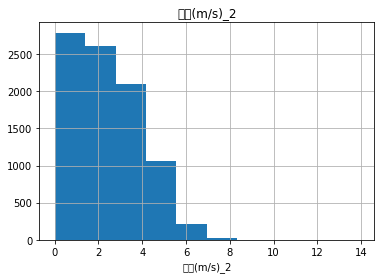

In [12]:
import matplotlib.pyplot as plt
df['風速(m/s)_2'].hist()  
plt.title('風速(m/s)_2')
plt.xlabel('風速(m/s)_2')  
plt.show()

In [13]:
df.corr()[[feature]].sort_values(feature)

,溫度(℃)
測站氣壓(hPa)_3,-0.801619
測站氣壓(hPa)_2,-0.800481
相對溼度(%)_2,-0.385098
相對溼度(%)_3,-0.354754
風速(m/s)_3,-0.181500
風速(m/s)_2,-0.178292
風向_3,0.308542
風向_2,0.320328
溫度(℃)_3,0.949290
溫度(℃)_2,0.970470


In [14]:
predictors = ['溫度(℃)_2',  '溫度(℃)_3',  '測站氣壓(hPa)_2',  '測站氣壓(hPa)_3']
df_choose = df[['溫度(℃)'] + predictors]  

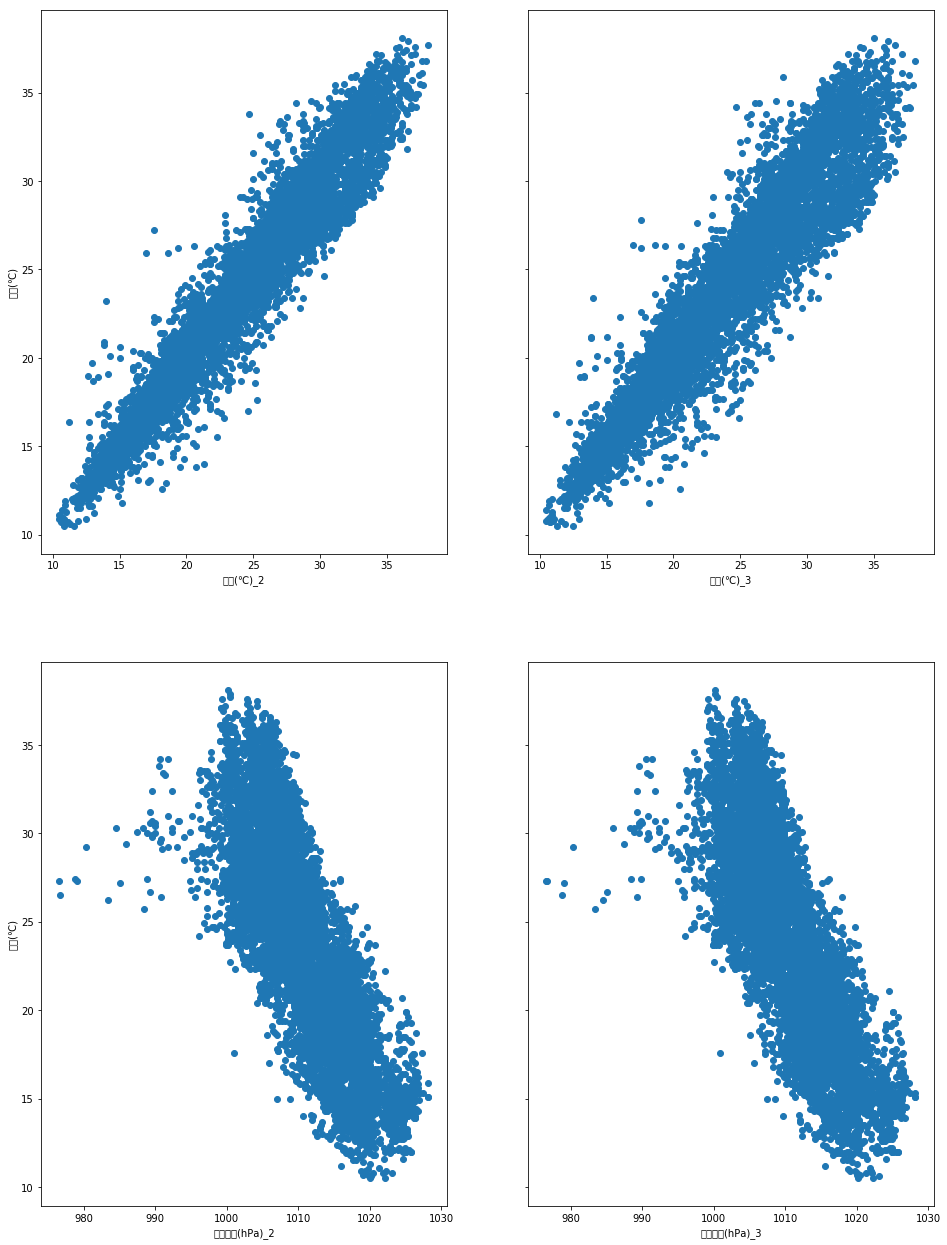

In [15]:
import matplotlib  
import matplotlib.pyplot as plt  
import numpy as np
plt.rcParams['figure.figsize'] = [16, 22]
fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True)
arr = np.array(predictors).reshape(2, 2)
for row, col_arr in enumerate(arr):  
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df_choose[feature], df_choose['溫度(℃)'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='溫度(℃)')
        else:
            axes[row, col].set(xlabel=feature)
plt.show()

In [16]:
import statsmodels.api as sm
import sklearn
df_choose = sklearn.utils.shuffle(df_choose)
X = df_choose[predictors]  
y = df_choose['溫度(℃)']

X = sm.add_constant(X)  
X.head()

,const,溫度(℃)_2,溫度(℃)_3,測站氣壓(hPa)_2,測站氣壓(hPa)_3
序號,,,,,
408,1.0,19.5,19.7,1015.4,1015.4
7142,1.0,17.5,17.7,1010.7,1009.1
8031,1.0,18.2,17.9,1020.2,1020.0
835,1.0,23.0,24.4,1014.2,1014.5
3053,1.0,26.4,26.9,1009.8,1010.1


In [17]:
alpha = 0.05

model = sm.OLS(y, X).fit()

model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  溫度(℃)   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 3.915e+04
Date:                Sat, 18 May 2019   Prob (F-statistic):               0.00
Time:                        16:39:56   Log-Likelihood:                -15179.
No. Observations:                8781   AIC:                         3.037e+04
Df Residuals:                    8776   BIC:                         3.040e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          82.5622      3.868     21.344      0.000      74.980      90.145
溫度(℃)_2         1.2144      0.016     74.984      0.000       1.183       1.246
溫度(℃)_3        -0.3169      0.016    -19.747      0.000      -0.348      -0.285
測站氣壓(hPa)_2    -0.0170      0.016     -1.079      0.281      -0.048       0.014
測站氣壓(hPa)_3    -0.0623      0.016     -3.909      0.000      -0.093      -0.031
==============================================================================
Omnibus:                      970.093   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8240.431
Skew:                           0.170   Prob(JB):                         0.00
Kurtosis:                       7.734   Cond. No.                     3.80e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
X = X.drop('測站氣壓(hPa)_2', axis=1)
model = sm.OLS(y, X).fit()
model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  溫度(℃)   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 5.220e+04
Date:                Sat, 18 May 2019   Prob (F-statistic):               0.00
Time:                        16:41:47   Log-Likelihood:                -15180.
No. Observations:                8781   AIC:                         3.037e+04
Df Residuals:                    8777   BIC:                         3.040e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          82.2536      3.858     21.322      0.000      74.692      89.816
溫度(℃)_2         1.2205      0.015     80.487      0.000       1.191       1.250
溫度(℃)_3        -0.3229      0.015    -21.463      0.000      -0.352      -0.293
測站氣壓(hPa)_3    -0.0790      0.004    -21.116      0.000      -0.086      -0.072
==============================================================================
Omnibus:                      952.482   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7972.819
Skew:                           0.158   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     2.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
X = X.drop('const', axis=1)

In [20]:
X

,溫度(℃)_2,溫度(℃)_3,測站氣壓(hPa)_3
序號,,,
408,19.5,19.7,1015.4
7142,17.5,17.7,1009.1
8031,18.2,17.9,1020.0
835,23.0,24.4,1014.5
3053,26.4,26.9,1010.1
137,18.5,18.7,1020.6
4830,24.0,24.0,1006.4
7873,17.4,17.6,1011.4
7417,14.1,14.7,1019.6


In [21]:
print(X.mean(axis=0))
print(X.std(axis=0))

溫度(℃)_2          23.886516
溫度(℃)_3          23.886232
測站氣壓(hPa)_3    1010.499932
dtype: float64
溫度(℃)_2        5.917852
溫度(℃)_3        5.918066
測站氣壓(hPa)_3    6.441873
dtype: float64


In [22]:
#X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12) 
#regressor = svm.SVR(kernel='rbf')
regressor = LinearRegression(n_jobs = -1)
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test)

0.9479631474989779

In [23]:
from sklearn.metrics import mean_absolute_error, median_absolute_error  
prediction = regressor.predict(X_test)
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))  
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction))  
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction))

The Explained Variance: 0.95
The Mean Absolute Error: 0.96 degrees celsius
The Median Absolute Error: 0.66 degrees celsius


In [24]:
from sklearn.feature_selection import f_regression
print(f_regression(X, y)[1])

[0. 0. 0.]


In [25]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(regressor, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.95 (+/- 0.01)


In [26]:
import pickle
with open('first_outcome.pickle','wb') as f:
    pickle.dump(regressor, f)

In [27]:
pickle_in = open('first_outcome.pickle','rb')
regressor = pickle.load(pickle_in)

In [28]:
regressor.score(X_test,y_test)

0.9479631474989779

In [29]:
X_test

,溫度(℃)_2,溫度(℃)_3,測站氣壓(hPa)_3
序號,,,
2488,32.7,34.9,1006.3
4210,28.0,28.4,1005.0
3906,31.3,33.2,1004.6
19,16.2,16.9,1019.7
4704,25.4,25.3,1001.1
2400,30.6,29.9,1006.7
1711,21.2,20.7,1010.5
2276,28.0,28.1,1009.7
8732,20.4,19.8,1017.4


In [32]:
regressor.predict([[29.0,29.1,1005.1]])

array([28.89206867])

以下為直接丟

In [25]:
X = np.array(df.drop(['溫度(℃)'],axis = 1))
X = preprocessing.scale(X)
y = np.array(df['溫度(℃)'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
#regressor = LinearRegression(n_jobs = -1)
regressor = svm.SVR(kernel='rbf')
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test)

0.80836610658105

In [28]:
from sklearn.feature_selection import f_regression
print(f_regression(X, y)[1])

[0.00000000e+000 0.00000000e+000 3.84542939e-221 3.43976121e-077]
